# Week 1: Playing with Lightcurves and SFR/AGN relationships

## 1. Different SFR/AGN dependencies

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import Lightcurves as Lifetimes
import matplotlib.pyplot as plt
import NewFunctions
import MPhysClasses
import bagpipes
from scipy import optimize

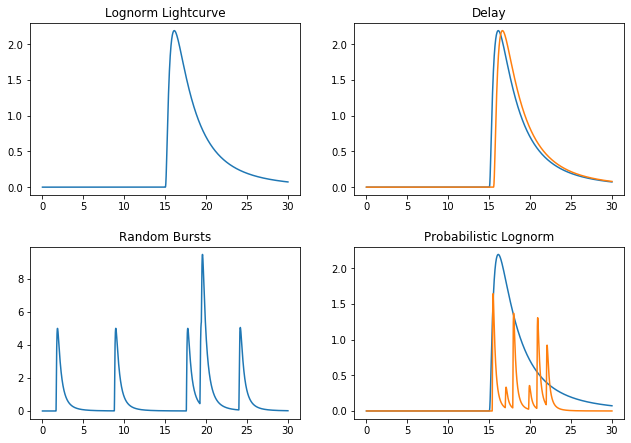

In [2]:
t, f = Lifetimes.lognorm_lightcurve(30, 1e-2, norm = 10, scale = 3) # outputs x,y coords
t1, f1 = Lifetimes.delay(t, f, t_delay = 0.5)
t2, f2 = Lifetimes.random_burst(30, 1e-2, 5, 0.5, 5, bursttype = 'lognorm')
t3, f3, dd = Lifetimes.probabilistic_lognorm(t, f, 1, 0.3, downtime = 3, f_max = max(f)*30)

fig, ax = plt.subplots(2,2, sharex = True, sharey = True) #subplot object, axes tuple

plt.subplot(2, 2, 1).plot(t, f)
plt.title('Lognorm Lightcurve') #star formation lightcurve
plt.subplot(2, 2, 2).plot(t, f, t1, f1)
plt.title('Delay') #AGN activity as delayed from onset of star formation
plt.subplot(2, 2, 3).plot(t2, f2)
plt.title('Random Bursts') #AGN activity independent of star formation
plt.subplot(2, 2, 4).plot(t, f, t3, f3)
plt.title('Probabilistic Lognorm')

plt.subplots_adjust(hspace = 0.3, top = 1.5, right = 1.5)

plt.show()

## 2. AGN Flux vs SFR Flux

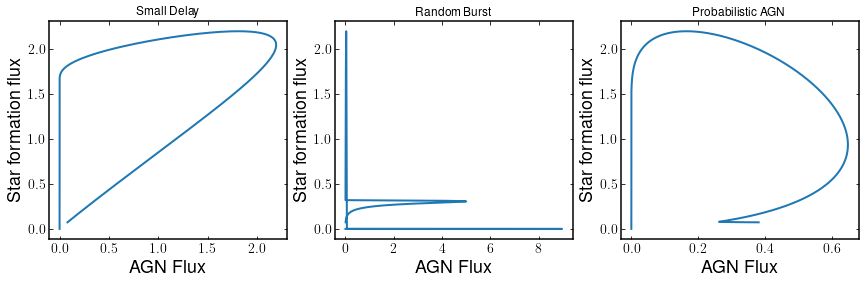

(0.4965179565951457, 1.544982038751228e-186)

In [27]:
fig, ax = plt.subplots(1, 3, sharex = True, sharey = True)

a, b = Lifetimes.lognorm_lightcurve(30, 1e-4, norm = 10)
c, d, e = Lifetimes.probabilistic_lognorm(a, b, 1, 0.1, downtime = 1)

plt.subplot(1, 3, 1).plot(f1, f)
plt.gca().set_xlabel('AGN Flux')
plt.gca().set_ylabel('Star formation flux')
plt.gca().set_title('Small Delay')

plt.subplot(1, 3, 2).plot(f2, f)
plt.gca().set_xlabel('AGN Flux')
plt.gca().set_ylabel('Star formation flux')
plt.gca().set_title('Random Burst')

plt.subplot(1, 3, 3).plot(f3, f)
plt.gca().set_xlabel('AGN Flux')
plt.gca().set_ylabel('Star formation flux')
plt.gca().set_title('Probabilistic AGN')

plt.subplots_adjust(right = 2)

plt.show()

scs.pearsonr(f, f3)

## 3. Simulating Populations of Galaxies with AGN Activity

In [2]:
#Parameters
agnlcparsP = {'downtime':500, 'burstwidth':5e8, 'f_max':2000}
agnlcparsP2 = {'downtime':500, 'burstwidth':5e7, 'f_max':2000}
agnlcparsD = {}
agnlcparsR = {'burstlength':1e7, 'downtime':2e8}

lcpars = {'stretch':2e8, 'loc':1e9}
no_gals = 200
sbscale = 100

In [3]:
Prob_Sim = MPhysClasses.AGNSFR('prob_lognorm', tmax = 1e10, deltat = 1e7, agnlcpars = agnlcparsP, lcpars = lcpars, no_gals = no_gals, sbscale = sbscale, name = 'Prob Sim')

Drawing galaxy sample.....
Getting Main Sequence calibration....
Getting black hole masses and Eddington luminosities.....
Creating lightcurves....
Creating AGN lightcurves....
Adding SF baseline...
Truncating AGN lightcurves.....


In [316]:
Prob_Sim2 = MPhysClasses.AGNSFR('prob_lognorm', tmax = 1e10, deltat = 1e7, agnlcpars = agnlcparsP2, lcpars = lcpars, no_gals = no_gals, sbscale = sbscale, name = 'Prob Sim')

Drawing galaxy sample.....
Getting Main Sequence calibration....
Getting black hole masses and Eddington luminosities.....
Creating lightcurves....
Creating AGN lightcurves....
Adding SF baseline...
Truncating AGN lightcurves.....


In [6]:
Delay_Sim = MPhysClasses.AGNSFR('delay', tmax = 1e10, deltat = 1e7, agnlcpars = agnlcparsD, lcpars = lcpars, no_gals = no_gals, sbscale = sbscale, name = 'Delay Sim')

Drawing galaxy sample.....
Getting Main Sequence calibration....
Getting black hole masses and Eddington luminosities.....
Creating lightcurves....
Creating AGN lightcurves....
Adding SF baseline...
Truncating AGN lightcurves.....


In [7]:
Random_Sim = MPhysClasses.AGNSFR('random', tmax = 1e9, deltat = 1e6, agnlcpars = agnlcparsR, lcpars = lcpars, no_gals = no_gals, sbscale = sbscale, name = 'Random Sim')

Drawing galaxy sample.....
Getting Main Sequence calibration....
Getting black hole masses and Eddington luminosities.....
Creating lightcurves....
Creating AGN lightcurves....
Adding SF baseline...
Truncating AGN lightcurves.....


### 3.1 M-$\sigma$ Relation

(0.9450701836974663, 4.196957528643604e-98)

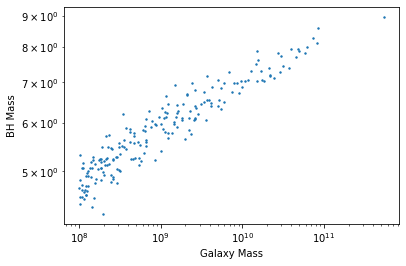

In [33]:
Prob_Sim.msigma()

### 3.2 Simulation Plots

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

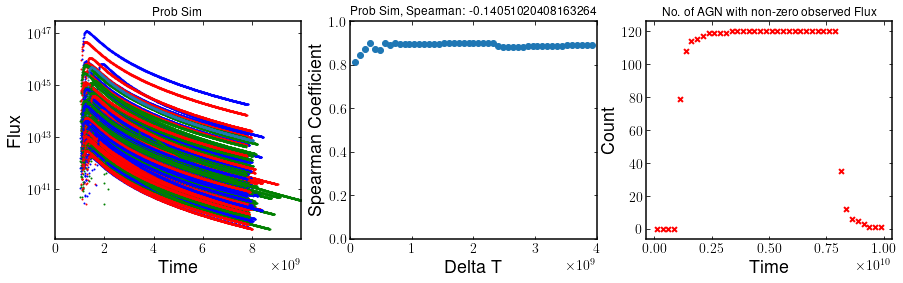

In [108]:
Prob_Sim.AllPlots('Spearman', True, 50, 500, 40)

734693877.5510205

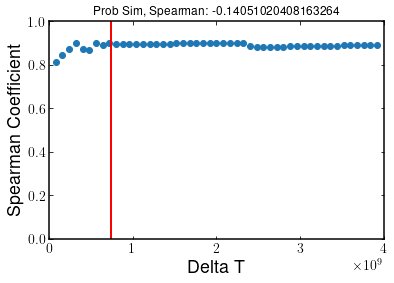

In [112]:
Coeffs = Prob_Sim.Coefficients('Spearman', True, 50, 500, plot = True, vline = 734693877.5510205)[0];
NewFunctions.FindCorr(Coeffs, 4, 500)

Text(0,0.5,'Burstwidth')

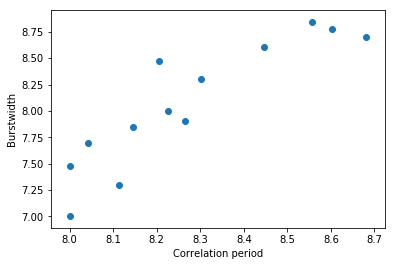

In [104]:
X = [1.6e7, 1.8e7, 2.2e7, 3e7, 3.9e7, 4.5e7, 2.6e8]
Y = [5e6, 8e6, 1e7, 3e7, 5e7, 8e7, 5e8]

X1 = [4e8, 3.6e8, 4.8e8, 2.8e8, 1.6e8, 1.68e8, 1.84e8, 1.4e8, 1.1e8, 1e8, 1.3e8, 1e8, 2e8]
Y1 = [6e8, 7e8, 5e8, 4e8, 3e8, 1e8, 8e7, 7e7, 5e7, 3e7, 2e7, 1e7, 2e8]

fig = plt.figure()
plt.scatter(x = np.log10(X1), y = np.log10(Y1))
plt.gca().set_xlabel('Correlation period')
plt.gca().set_ylabel('Burstwidth')

### 3.2.1 Average Time to Reach Peak Flux

500


1164550000.0

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

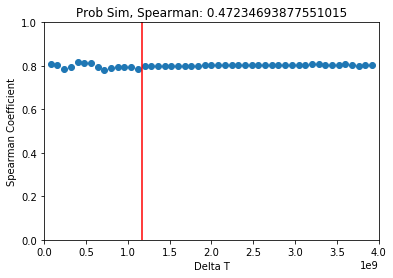

In [34]:
Prob_Sim.TimeAverage(Tmax = True, tscale = 500)

### 3.2.2 Histogram of Times to AGN Triggering

<Figure size 432x288 with 0 Axes>

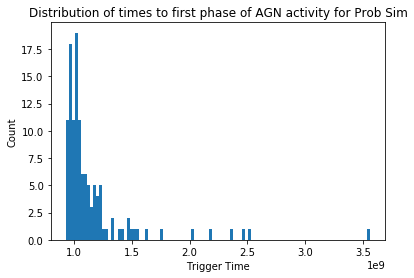

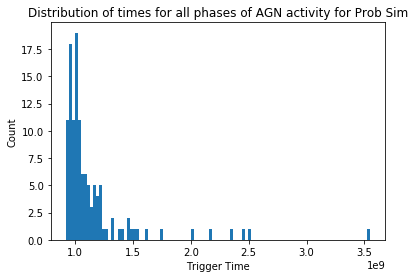

In [35]:
Prob_Sim.Histogram(100, AllBursts = False)
Prob_Sim.Histogram(100, AllBursts = True)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

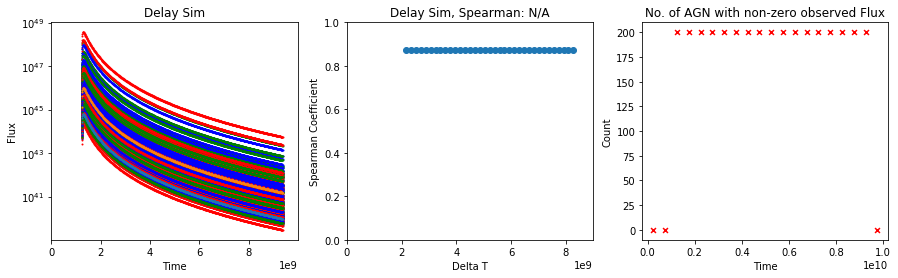

In [36]:
Delay_Sim.AllPlots('Spearman', True, 50, 1000, 20)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

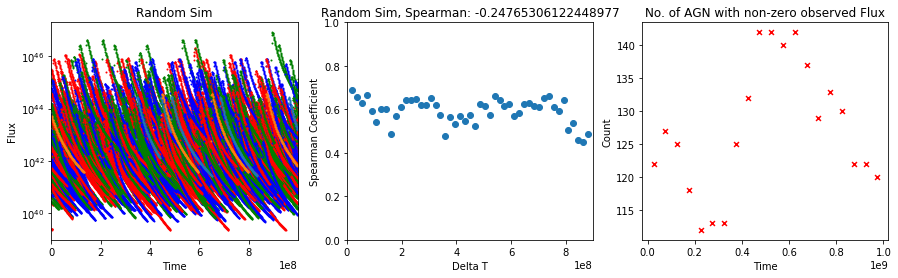

In [37]:
Random_Sim.AllPlots('Spearman', True, 50, 1000, 20)

# Weeks 2 & 3: Pearsons Coefficients and Correlations

## 4. Pearson and Spearman Coefficients

 - The Spearman coeff. plots are visibly different when plotting log(Flux) compared to when plotting just Flux. When I plot log values I drop the SFR which have corresponding AGN Flux == 0. Briefly, I have chosen to do this because at this point the AGN Flux has dropped below the threshold for observation and is as good as non-existent and can contribute nothing to a correlation between observed AGN and observed SF. By reducing datasets in this manner the AGN vs SFR Flux plots are more sparce and the correlations are weaker. However when not taking Log(Flux) these zero values remain and the datasets are of the same size. The correlations then follow the lightcurve pattern, in accordance with the fact that AGN activity is less likely (and hence producing more zero values) at lower input Flux/further in time. This can be seen by looking at the plots in section 4.2.
 
 - With the Pearson coefficient the shape of flux distributions matters. For similar reasons as with the Spearman coefficient the log(Flux) drops differently to the Flux plots. As the flux are logarithmically distributed, it is inherently not linear which is why the pearson coeffs. are low. Unlike with the Spearman case, removing zero values for the AGN flux only brings the pearson values close to one another, not equal. This is because the shape of plots matters for Pearson coeffs, so log(flux) is more linear than flux on its own.
 
 - Think these plots in conjuction with those in S4.2 say that correlation is highest during periods of high agn activity. 


### 4.1 Sample Datapoints from Coefficient Plots: Flux Plots at Different Timesteps.

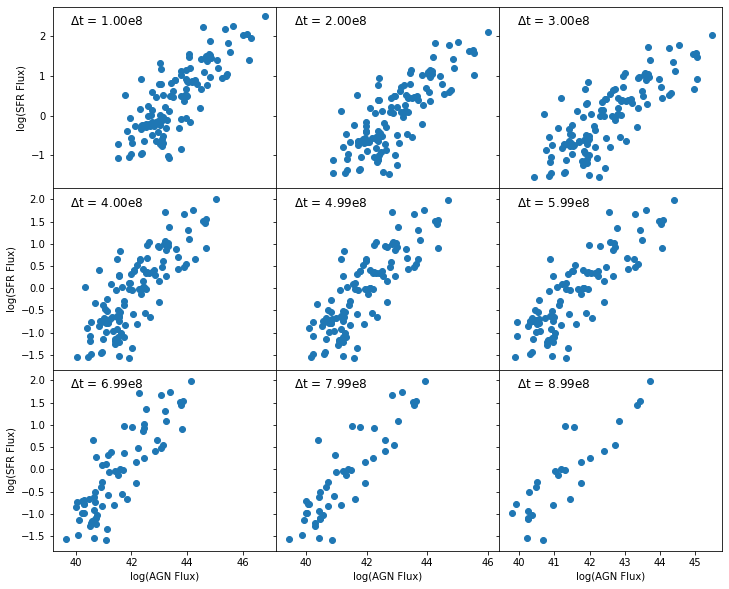

In [10]:
Prob_Sim.GridPlot((3, 3), 'Spearman', True)

### 4.2 Average Flux by Bins

<Figure size 432x288 with 0 Axes>

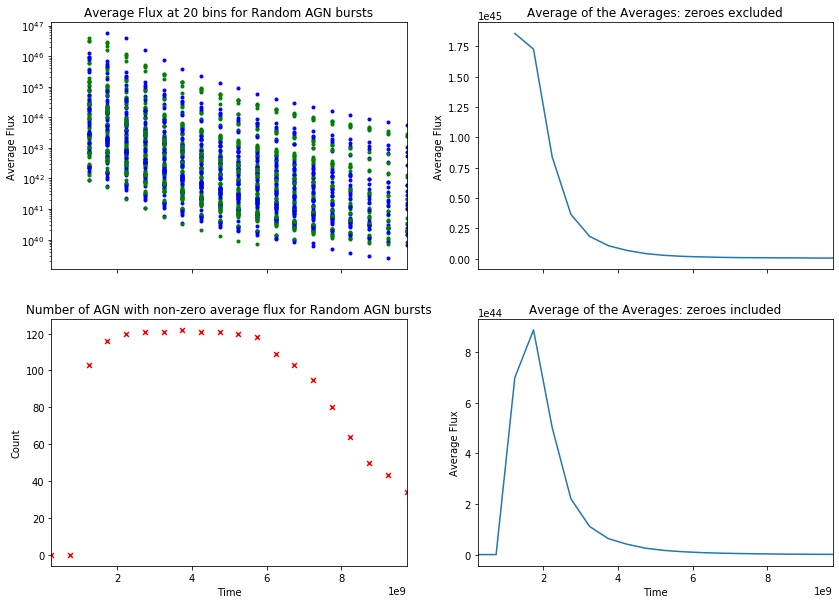

In [5]:
NewFunctions.Average(20, Prob_Sim.SimPlot(plot = False), no_gals, log_y = False, name = 'Random AGN bursts', Return = False)

The probabilistic simulation provides AGN lightcurves that are most popular at high input flux. Overplotting the star formation lightcurve in this way shows that, overall, the AGN light curves die out with the SF lightcurves. This suggests that the trend of a population of AGN produced in this way will follow this pattern. 

# Week 4 - 7: BAGPIPES

In [18]:
Lifetimes.MyCosmology.cosmocal(model_components["redshift"])['ageAtZ']

11.030248285354316

In [237]:
lognormal = {}
lognormal['tmax'] = 10.5
lognormal['fwhm'] = 0.2
lognormal['massformed'] = 9
lognormal['metallicity'] = 0.02

dblplaw = {}
dblplaw['alpha'] = 0.5
dblplaw['beta'] = 10
dblplaw['tau'] = 3
dblplaw['massformed'] = 11
dblplaw['metallicity'] = 0.2

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # mag

nebular = {}
nebular["logU"] = -3.

model_components = {}                   # The model components dictionary
model_components["redshift"] = 0.2      # Observed redshift  
model_components["lognormal"] = lognormal
model_components["dust"] = dust
model_components['dblplaw'] = dblplaw
#model_components['nebular'] = nebular

obs_wavs = np.arange(3000.0, 6000.0, 0.1)

goodss_filt_list = np.loadtxt("filters/goodss_filt_list.txt", dtype="str")
fourkfilter = ["filters/4kfilter"]

first_galaxy = bagpipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=obs_wavs)

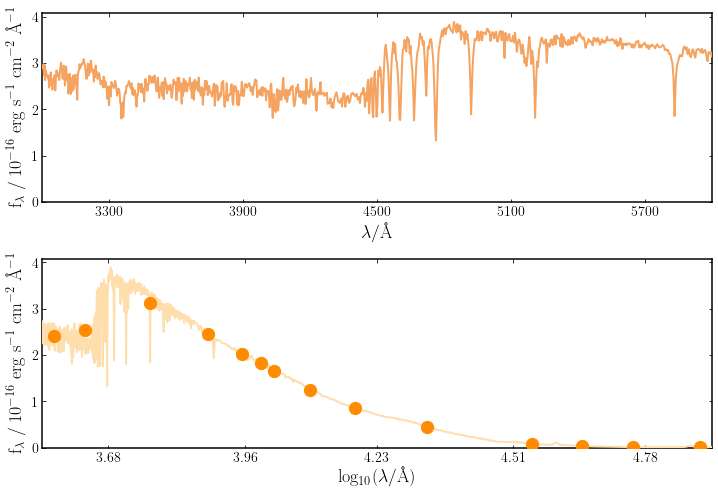

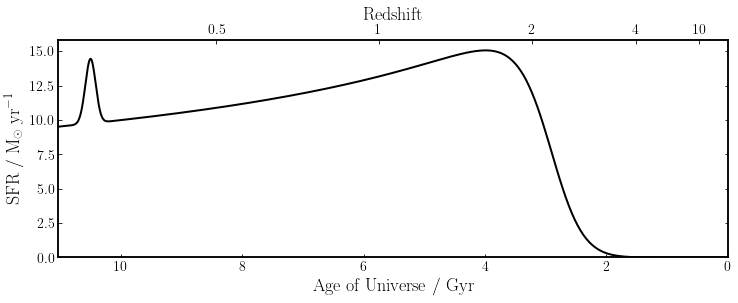

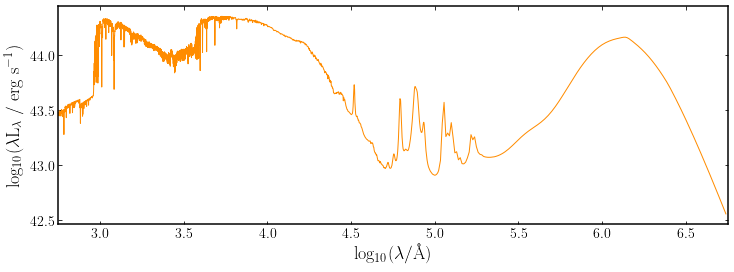

In [238]:
first_galaxy.update(model_components)
fig = first_galaxy.plot()
fig = first_galaxy.sfh.plot()
fig = first_galaxy.plot_full_spectrum()

In [239]:
masses = Prob_Sim.data['m_gal']
ledds = Prob_Sim.data['ledd']
thresh = 0.5
SB_sfh_list = []
NSB_sfh_list = []
SB_sfhs = []
NSB_sfhs = []
SB_spectra = []
NSB_spectra = []
SB_mass = []
NSB_mass = []
lognormsfh = []
bheights = []

for i in range(len(masses)):
    
    model_components = {}
    model_components["redshift"] = 0.2

    dust = {}
    dust["type"] = "Calzetti"
    dust["Av"] = 0.2 

    dblplaw = {}
    dblplaw['alpha'] = 0.5
    dblplaw['beta'] = 10
    dblplaw['metallicity'] = 0.2
    model_components['dust'] = dust
    
    lognormal = {}
    lognormal['fwhm'] = 0.2
    lognormal['metallicity'] = 0.75
    
    time_dblp = np.random.uniform(3, 6, 1)[0] #creates randomness in when galaxies formed
    dblplaw['tau'] = time_dblp
    
    time_lgnl = np.random.uniform(11.4, 10, 1)[0]
    lognormal['tmax'] = time_lgnl
    mass_fraction = np.random.uniform(5, 20, 1)[0] #randomness to the amount of mass in a starburst.
    lognormal['massformed'] = np.log10(masses[i]/mass_fraction)
    
    chance = np.random.uniform(0, 1, 1)[0]
    
    if chance > thresh: #Separating starburst galaxies from galaxies with out starbursts
        model_components['lognormal'] = lognormal #Only some galaxies will have starbursts.
        dblplaw['massformed'] = np.log10(masses[i] - (masses[i]/mass_fraction))
        model_components['dblplaw'] = dblplaw
        _galaxy = bagpipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=obs_wavs)
        SB_sfhs.append(_galaxy.sfh.sfh)
        SB_sfh_list.append(_galaxy.sfh.sfh[0])
        SB_spectra.append(_galaxy.spectrum)
        SB_mass.append(masses[i])
        lognormsfh.append(_galaxy.sfh.component_sfrs['lognormal'])
        bheights.append(ledds[i])
    else: #Galaxies without starbursts
        dblplaw['massformed'] = np.log10(masses[i])
        model_components['dblplaw'] = dblplaw
        _galaxy = bagpipes.model_galaxy(model_components, filt_list=goodss_filt_list, spec_wavs=obs_wavs)
        NSB_sfhs.append(_galaxy.sfh.sfh)
        NSB_sfh_list.append(_galaxy.sfh.sfh[0])
        NSB_spectra.append(_galaxy.spectrum)
        NSB_mass.append(masses[i])
    
Time = (_galaxy.sfh.age_of_universe - _galaxy.sfh.ages)*10**-9

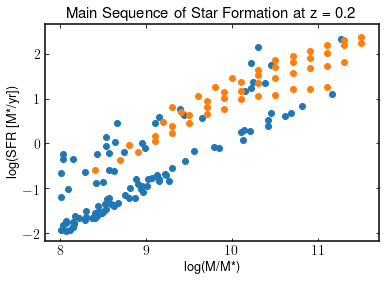

In [240]:
fig = plt.figure()

plt.scatter(x = np.log10(SB_mass), y = np.log10(SB_sfh_list))
plt.gca().set_xlabel('log(M/M*)', size = 13);
plt.gca().set_ylabel('log(SFR [M*/yr])', size = 13);
plt.gca().set_title('Main Sequence of Star Formation at z = {}'.format(model_components['redshift']), size = 15);
MSD = pd.read_csv('MainSequenceData')
plt.scatter(x = MSD['LogM*'], y = MSD['LogSFR'])
#plt.savefig('MainSequence.png')

In [241]:
MASS = SB_mass
sfh_list = SB_sfh_list
sfhs = SB_sfhs
spectra = SB_spectra
bins = 4
binlist = []
AoU = Lifetimes.MyCosmology.cosmocal(model_components["redshift"])['ageAtZ']

for i in range(bins):
    binlist.append([i]*(int(len(MASS)/bins)))

if (len(MASS) - len(np.ravel(binlist))) != 0:
    diff = (len(MASS) - len(np.ravel(binlist)))
    for i in range(1, diff + 1):
        MASS.remove(MASS[-i])
        sfh_list.remove(sfh_list[-i])
    
dataf = pd.DataFrame(np.log10(MASS), np.log10(sfh_list)).reset_index()
dataf = dataf.rename(columns = {'index':'SFRs', 0:'Mass'}).sort_values(by = 'Mass').reset_index().drop('index', axis = 1)
    
dataf['Groups'] = np.ravel(binlist)
samples = []

for name, group in dataf.groupby(by = dataf['Groups']):
    samples.append([group.nlargest(3, 'SFRs', keep = 'all'), group.nsmallest(3, 'SFRs', keep = 'all')])

size = 3*len(np.unique(binlist))
sfh_df_max = pd.DataFrame(Time, columns = ['Age of Universe [Gyr]'])
sfh_df_min = pd.DataFrame(Time, columns = ['Age of Universe [Gyr]'])
Selected_Sfrs_M = []
Selected_Mass_M = []
Selected_Sfrs_L = []
Selected_Mass_L = []
T_Max, T_Min = [], []
labels = []
    
for i in range(size):
    ind = len(np.unique(binlist))
    ind_max = list(np.log10(MASS)).index(samples[int(i/3)][0].iloc[i%3, 1])
    ind_min = list(np.log10(MASS)).index(samples[int(i/3)][1].iloc[i%3, 1])
    
    Selected_Sfrs_M.append(samples[int(i/3)][0].iloc[i%3, 0])
    Selected_Mass_M.append(samples[int(i/3)][0].iloc[i%3, 1])
    
    Selected_Sfrs_L.append(samples[int(i/3)][1].iloc[i%3, 0])
    Selected_Mass_L.append(samples[int(i/3)][1].iloc[i%3, 1])
    
    sfh_df_max['Flux {} [M*/yr]'.format(i)] = sfhs[ind_max]
    sfh_df_min['Flux {} [M*/yr]'.format(i)] = sfhs[ind_min]
    
    m_t = Time[lognormsfh[ind_max] > 1e-3]
    l_t = Time[lognormsfh[ind_min] > 1e-3]
    T_Max.append(AoU - m_t[-1])
    T_Min.append(AoU - l_t[-1])
    
    if i == 0:
        Spectra_max = pd.DataFrame(spectra[ind_max], columns = ['Observed $\lambda$ [Angstrom]', 'Flux {} [M*/yr]'.format(i)])
        Spectra_min = pd.DataFrame(spectra[ind_min], columns = ['Observed $\lambda$ [Angstrom]', 'Flux {} [M*/yr]'.format(i)])
    else:
        _df1 = pd.DataFrame(spectra[ind_max], columns = ['Observed $\lambda$ [Angstrom]', 'Flux {} [M*/yr]'.format(i)])
        _df2 = pd.DataFrame(spectra[ind_min], columns = ['Observed $\lambda$ [Angstrom]', 'Flux {} [M*/yr]'.format(i)])
        Spectra_max = pd.merge(Spectra_max, _df1, left_on = 'Observed $\lambda$ [Angstrom]', right_on = 'Observed $\lambda$ [Angstrom]')
        Spectra_min = pd.merge(Spectra_min, _df2, left_on = 'Observed $\lambda$ [Angstrom]', right_on = 'Observed $\lambda$ [Angstrom]')
     
    labels.append('Flux {} [M*/yr]'.format(i))
    
sfh_df_max = sfh_df_max[sfh_df_max['Age of Universe [Gyr]'] > 0.0]
sfh_df_min = sfh_df_min[sfh_df_min['Age of Universe [Gyr]'] > 0.0]

Sfrs_n_Masses = pd.DataFrame([Selected_Sfrs_M, Selected_Mass_M, T_Max, Selected_Sfrs_L, Selected_Mass_L, T_Min], columns = labels)
Sfrs_n_Masses.rename(index = {0:'High SFR log(SFR [M*/yr])', 1:' High SFR log(M [M*])', 2:'High Delta T [Gyr]', 3:'Low SFR log(SFR [M*/yr])', 4:' Low SFR log(M [M*])', 5:'Low Delta T [Gyr]'}, inplace = True)

#sfh_df_min.to_csv('Min SF History z={} V2'.format(model_components['redshift']), sep = ',', index = False)
#sfh_df_max.to_csv('Max SF History z={} V2'.fonebular.spectrum(first_galaxy.sfh.ceh.grid, 0.01, model_components["nebular"]["logU"])rmat(model_components['redshift']), sep = ',', index = False)
#Sfrs_n_Masses.to_csv('SFRs and Masses z={} V2'.format(model_components['redshift']), sep = ',')
#Spectra_max.to_csv('Max Spectral Data z={} V2'.format(model_components['redshift']), sep = ',', index = False)
#Spectra_min.to_csv('Min Spectral Data z={} V2'.format(model_components['redshift']), sep = ',', index = False)

,Universe Time,SFH 0,AGN Time 0,AGN Flux 0,SFH 1,AGN Time 1,AGN Flux 1,SFH 2,AGN Time 2,AGN Flux 2,...,5106,5107,5108,5109,5110,5111,5112,5113,5114,5115
1062,1.101060e+10,0.120508,1.083089e+10,2.042041e+32,0.000991,1.077297e+10,5.478957e+42,5.672599e-23,1.047874e+10,1.256534e+44,...,1.106451e+43,0.171878,1.094045e+10,0.000000e+00,2.147864e-10,1.061694e+10,3.586167e+43,0.342342,1.090539e+10,0.000000e+00
1063,1.101074e+10,0.120370,1.083125e+10,4.390507e+37,0.000987,1.077344e+10,5.472028e+42,5.586653e-23,1.047974e+10,1.251289e+44,...,1.104441e+43,0.172904,1.094061e+10,0.000000e+00,2.126339e-10,1.061769e+10,3.572802e+43,0.343401,1.090562e+10,0.000000e+00
1064,1.101088e+10,0.120232,1.083162e+10,8.983659e+38,0.000983,1.077391e+10,5.465010e+42,5.502481e-23,1.048073e+10,1.246071e+44,...,1.102427e+43,0.173929,1.094078e+10,0.000000e+00,2.105147e-10,1.061844e+10,3.559491e+43,0.344456,1.090585e+10,0.000000e+00
1065,1.101102e+10,0.120095,1.083199e+10,4.701447e+39,0.000978,1.077438e+10,5.457904e+42,5.420037e-23,1.048173e+10,1.240880e+44,...,1.100410e+43,0.174954,1.094095e+10,0.000000e+00,2.084281e-10,1.061919e+10,3.546234e+43,0.345507,1.090608e+10,0.000000e+00
1066,1.101115e+10,0.119958,1.083235e+10,1.420134e+40,0.000974,1.077485e+10,5.450712e+42,5.339281e-23,1.048273e+10,1.235716e+44,...,1.098390e+43,0.175978,1.094112e+10,0.000000e+00,2.063735e-10,1.061994e+10,3.533031e+43,0.346554,1.090631e+10,0.000000e+00
1067,1.101129e+10,0.119822,1.083272e+10,3.202366e+40,0.000970,1.077532e+10,5.443436e+42,5.260170e-23,1.048373e+10,1.230578e+44,...,1.096366e+43,0.177002,1.094129e+10,0.000000e+00,2.043503e-10,1.062069e+10,3.519881e+43,0.347598,1.090655e+10,0.000000e+00
1068,1.101143e+10,0.119687,1.083308e+10,6.035536e+40,0.000966,1.077579e+10,5.436079e+42,5.182665e-23,1.048473e+10,1.225467e+44,...,1.094340e+43,0.178025,1.094145e+10,0.000000e+00,2.023580e-10,1.062144e+10,3.506784e+43,0.348637,1.090678e+10,0.000000e+00
1069,1.101156e+10,0.119552,1.083345e+10,1.008645e+41,0.000962,1.077626e+10,5.428642e+42,5.106727e-23,1.048573e+10,1.220383e+44,...,1.092310e+43,0.179049,1.094162e+10,0.000000e+00,2.003959e-10,1.062219e+10,3.493741e+43,0.349673,1.090701e+10,0.000000e+00
1070,1.101170e+10,0.119418,1.083381e+10,1.547246e+41,0.000958,1.077673e+10,5.421126e+42,5.032319e-23,1.048673e+10,1.215324e+44,...,1.090278e+43,0.180071,1.094179e+10,0.000000e+00,1.984635e-10,1.062294e+10,3.480751e+43,0.350705,1.090724e+10,0.000000e+00
1071,1.101183e+10,0.119284,1.083418e+10,2.226787e+41,0.000954,1.077720e+10,5.413534e+42,4.959403e-23,1.048773e+10,1.210292e+44,...,1.088243e+43,0.181093,1.094196e+10,0.000000e+00,1.965602e-10,1.062369e+10,3.467814e+43,0.351734,1.090747e+10,0.000000e+00


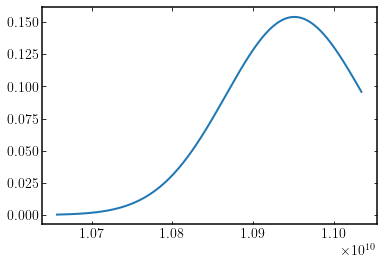

In [254]:
Time = (first_galaxy.sfh.age_of_universe - first_galaxy.sfh.ages)
T2 = Time[Time > 0][::-1]

for i in range(len(lognormsfh)):
    _df = pd.DataFrame()
    _df['Time'], _df['Flux'] = T2, lognormsfh[i][Time > 0.0][::-1]
    CutOff = _df[_df['Flux'] > 3e-4].iloc[0, :].name #cutoff stops unphysical agn activity occuring
    _df = _df.iloc[CutOff:, :]
    step = (_df['Time'].iloc[-1] - _df['Time'].iloc[0])/len(_df['Time'])
    T = np.arange(_df['Time'].iloc[0], max(_df['Time']), step)
    
    if len(T) > len(_df['Flux']):
        T = T[:-1]

    _t, _agn, _trigtimes = Lifetimes.probabilistic_lognorm(np.array(_df['Time']), np.array(_df['Flux']), 
                                                           bheights[i], 2e8, f_max = max(_df['Flux'])*10, 
                                                           downtime = 5, randomheight = False, ttype = 2, Time = T)
    
    _df2 = pd.DataFrame({'AGN Time': T, 'AGN Flux': _agn}).set_index(_df['Flux'].index)
    bagpipes_df = pd.concat([bagpipes_df, _df['Flux'], _df2], ignore_index = True, axis = 1)
    
    Column_Names[1 + i*3] = 'SFH {}'.format(i) #SFH history same as universal time ('LOG SCALe')
    Column_Names[2 + i*3] = 'AGN Time {}'.format(i) #AGN time NOT LOGSCALE, understand the point T (row 27)
    Column_Names[3 + i*3] = 'AGN Flux {}'.format(i)

bagpipes_df.rename(columns = Column_Names, inplace = True)
fig = plt.figure()
plt.plot(bagpipes_df.iloc[:, 0], bagpipes_df.iloc[:, 1])#, bagpipes_df.iloc[:, 2], bagpipes_df.iloc[:, 3]/1e45)

SpectraTimes = np.array(bagpipes_df[bagpipes_df['AGN Flux 0'] > 0.0]['Universe Time'])
bagpipes_df[bagpipes_df['AGN Flux 0'] > 0.0]

(3.5, 4)

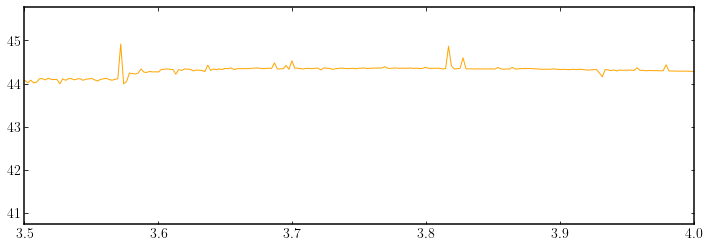

In [39]:
fig = plt.figure(figsize = (12, 4))
ax = plt.subplot()
log_wavs = np.log10(first_galaxy.wavelengths)
wav_mask = (log_wavs > 2.5) & (log_wavs < 6.75)

spec_full = first_galaxy.spectrum_full*first_galaxy.lum_flux*first_galaxy.wavelengths
spec_full = spec_full[wav_mask]

plt.plot(log_wavs[wav_mask], np.log10(spec_full), color='orange', lw=1)

ax.set_xlim(3.5, 4)

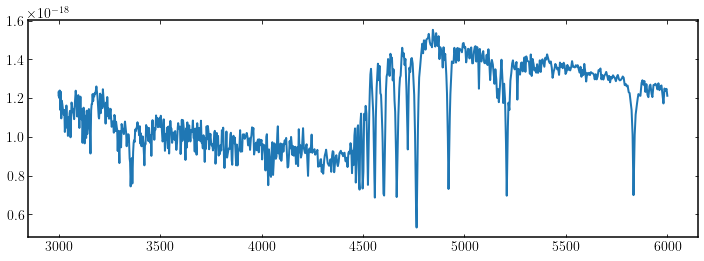

In [244]:
fig = plt.figure(figsize = (12, 4))
x, y = zip(*SB_spectra[0])
plt.plot(x, y)